<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [ ]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [ ]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [ ]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [ ]:
import spacy

In [ ]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [ ]:
len(content)

2340566

In [ ]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [ ]:
characters = set(characters1) | set(characters2) | set(characters3)

In [ ]:
characters = [c for c in list(characters) if c[0].isupper()]

In [ ]:
len(characters)

777

In [ ]:
characters = sorted(characters)

In [ ]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [ ]:
len(unique_characters)

534

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [20]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [21]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [ ]:
characters

,character,character_real
0,Rosa,Rosa
1,Watling,Watling
2,Kill Ashley,Ashley
3,Darcy,Darcy
4,Ulster,Ulster
...,...,...
221,Sadie Belle,Belle
222,Wynder,Wynder
223,Rene,Rene
224,India,India


In [23]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [24]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [25]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [26]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [27]:
result_df

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
...,...,...
13005,"""I won't think of it now,""",Dialogue
13006,"she said again, aloud, trying to push\nher mis...",Narrative
13007,"""I'll--why, I'll go home to Tara\ntomorrow,""",Dialogue
13008,and her spirits lifted faintly.\n\nShe had gon...,Narrative


In [28]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [29]:
result_df.head(n = 50)

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
6,answered Brent carelessly.,Narrative
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue
9,"""Why?""",Dialogue
11,"""The war, goose! The war's going to start any...",Dialogue
13,"""You know there isn't going to be any war,""",Dialogue


##4. Match Entities between Dialogue Sections

In [30]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [31]:
result_df.head(n=50)

,text,type,Entities
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative,"[Scarlett, Tarleton, Stuart, Brent, Tarleton, ..."
1,"""I know you two don't care about being expelle...",Dialogue,None
2,she said.,Narrative,[]
3,"""But what about Boyd? He's kind of set on get...",Dialogue,None
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue,None
6,answered Brent carelessly.,Narrative,[Brent]
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue,None
9,"""Why?""",Dialogue,None
11,"""The war, goose! The war's going to start any...",Dialogue,None
13,"""You know there isn't going to be any war,""",Dialogue,None


In [32]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [33]:
convo_df = convo_df.dropna()

In [34]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [35]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [36]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [37]:
convo_df

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count
0,Scarlett,Brent,1,19,"""I know you two don't care about being expelle...",Brent_Scarlett,1015
0,Stuart,Scarlett,21,27,"""The Yankees may be scared of us, but after th...",Scarlett_Stuart,971
0,Tom,Fontaine,29,33,"""Didn't she say anything when you got home las...",Fontaine_Tom,1302
0,Beatrice,Tarleton,35,35,"""Of course she won't hit Boyd. She never did ...",Beatrice_Tarleton,126
0,Stuart,Scarlett,37,49,"""That's why we left him\nat home to explain th...",Scarlett_Stuart,714
...,...,...,...,...,...,...,...
0,Ashley,Scarlett,12887,12897,"""But love can't wear out!""""Yours for Ashley di...",Ashley_Scarlett,1702
0,Rhett,Belle,12899,12911,"""It was so obvious that we were meant for each...",Belle_Rhett,2113
0,Ashley,Rhett,12913,12947,"""But then, there was Bonnie and I saw that eve...",Ashley_Rhett,2358
0,Gerald,Rhett,12949,12971,"""Don't be a fool, Rhett! I can make--""""Don't ...",Gerald_Rhett,1676


<Axes: xlabel='characters'>

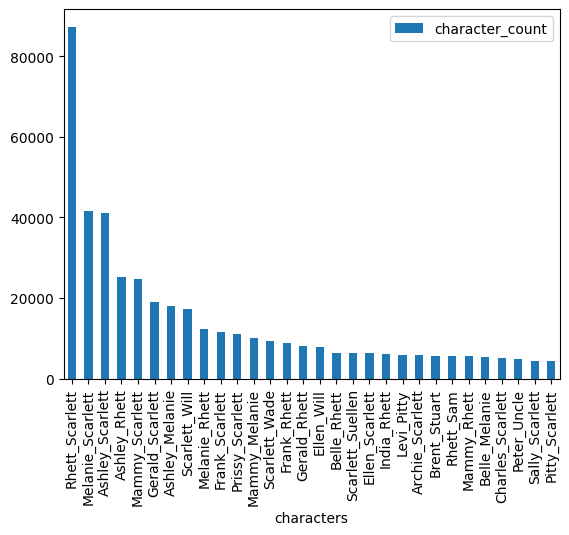

In [38]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [39]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [40]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [41]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

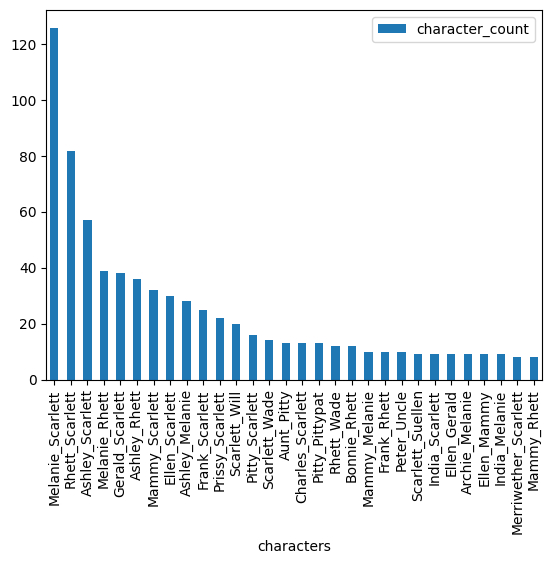

In [42]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

In [43]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [44]:
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

In [45]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["n't", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "there's", "there're", "they'd", "they've", "'twill", "s"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

# Define a function to remove stopwords from text
def remove_stopwords(text):

    # 1. Tokenize the text to remove stopwords
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    text = ' '.join(tokens_without_sw)

    #2. Remove punctuation
    tokens_without_punct = tokenizer_reg.tokenize(text.lower())
    text = ' '.join(tokens_without_punct)

    #punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    #text = punctuation_pattern.sub(' ', text.lower())

    #3. Remove names
    for substring in additional_stopwords:
        text = text.replace(substring, '')

    return text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)

# Print the DataFrame to see the result
convo_df_main['text_out_processed'].head(60)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                             careful careful take back
1      something important tell hardly know say near...
2                    none county touch state well missy
3     reason bought  asked buy well use buying  goin...
4     twelve oaks usual cade  settled  set gallery s...
5     well speak asked kindly sisters said hoped not...
6     sorry daughter nothing child lots x mother fif...
7     wish quit pushing want tara old plantation pla...
8     young come love land getting away irish child ...
9                     brat baptized yes dead poor thing
10    ley idea love could know always acted y ladyli...
11    getting another overseer would cheating eyetee...
12    put tray come lace tighter try eat little afte...
13      remember tiful day till die perhaps wedding day
14    mrs  takes toss every hunt breaks collar bone ...
15    drive  wear get horses yet course right right ...
16                looks knew looked like without shimmy
17    live barbecue till afternoon course attent

### 5.2 Pre-processing for LDA

In [46]:
def count_tokens(text):
    # Split the text by whitespace to get tokens
    tokens = text.split()
    # Return the count of tokens
    return len(tokens)

# Apply the function to each row in the 'text_out_processed' column
convo_df_main['token_count'] = convo_df_main['text_out_processed'].apply(count_tokens)

In [47]:
import pandas as pd

# Assuming convo_df_main is your existing DataFrame

# Create a new DataFrame with only the specified columns
new_df = convo_df_main[['characters', 'token_count', 'text_out_processed']].copy()

# Display the new DataFrame
print(new_df)

           characters  token_count  \
0     Gerald_Scarlett            4   
1    Melanie_Scarlett           11   
2     Gerald_Scarlett            6   
3     Gerald_Scarlett           23   
4     Gerald_Scarlett           58   
..                ...          ...   
298  Melanie_Scarlett           14   
299  Melanie_Scarlett            3   
300  Melanie_Scarlett           44   
301    Rhett_Scarlett          259   
302   Ashley_Scarlett          137   

                                    text_out_processed  
0                            careful careful take back  
1     something important tell hardly know say near...  
2                   none county touch state well missy  
3    reason bought  asked buy well use buying  goin...  
4    twelve oaks usual cade  settled  set gallery s...  
..                                                 ...  
298  good night promise anything darling   kind lov...  
299                                  woman friend ever  
300  want word either must cry

In [48]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Counting rows where token_count is less than 9 or equal to 9
count = len(new_df[(new_df['token_count'] < 9) | (new_df['token_count'] == 9)])

print("Number of rows where token_count is less than 9 or equal to 9:", count)

Number of rows where token_count is less than 9 or equal to 9: 101


In [49]:
import pandas as pd

# Assuming new_df is your DataFrame containing the columns characters, token_count, and text_out_processed

# Filter rows where token_count is 9 or less
filtered_df = new_df[new_df['token_count'] <= 9]

# Count occurrences of each word in the "characters" column
word_counts = filtered_df['characters'].value_counts()

# Print the counts
print("Number of rows with 9 or less tokens for each word in 'characters' column:")
print(word_counts)

Number of rows with 9 or less tokens for each word in 'characters' column:
characters
Melanie_Scarlett    53
Ashley_Scarlett     18
Gerald_Scarlett     15
Rhett_Scarlett      15
Name: count, dtype: int64


In [50]:
# Get unique values in the "characters" column
unique_characters = new_df['characters'].unique()

# Create separate DataFrames with different variable names
for character in unique_characters:
    globals()[f'df_{character.replace(" ", "_")}'] = new_df[new_df['characters'] == character].copy()

# Now, you have separate DataFrames named df_Gerald_Scarlett, df_Melanie_Scarlett, df_Rhett_Scarlett, and df_Ashley_Scarlett

In [51]:
df_Ashley_Scarlett

,characters,token_count,text_out_processed
10,Ashley_Scarlett,56,ley idea love could know always acted y ladyli...
13,Ashley_Scarlett,8,remember tiful day till die perhaps wedding day
17,Ashley_Scarlett,10,live barbecue till afternoon course attentive ...
20,Ashley_Scarlett,13,let hot headed let war misery world caused war...
26,Ashley_Scarlett,2,baby house
28,Ashley_Scarlett,5,want good time jine cavalry
61,Ashley_Scarlett,2,dear wife
64,Ashley_Scarlett,1,dixie
78,Ashley_Scarlett,10,forgive saying know love mad silly go porch s...
80,Ashley_Scarlett,10,gentlemen georgia troops well can t get along ...


In [52]:
import pandas as pd

# List of DataFrames
dataframes = [df_Ashley_Scarlett, df_Rhett_Scarlett, df_Gerald_Scarlett, df_Melanie_Scarlett]
for df in dataframes:
    # Drop the 'characters' column
    df.drop(columns=['characters'], inplace=True)

    # Reset the index
    df.reset_index(drop=True, inplace=True)

    # Print the DataFrame after removing the 'characters' column and resetting the index
    print(df)

    token_count                                 text_out_processed
0            56  ley idea love could know always acted y ladyli...
1             8    remember tiful day till die perhaps wedding day
2            10  live barbecue till afternoon course attentive ...
3            13  let hot headed let war misery world caused war...
4             2                                         baby house
5             5                        want good time jine cavalry
6             2                                          dear wife
7             1                                              dixie
8            10  forgive saying  know love mad silly go porch s...
9            10  gentlemen georgia troops well can t get along ...
10          143  perhaps old march ride shoot mrs  kindly lent ...
11            2                                            god ley
12            8           news news know fer sartin lady soon tell
13          229  could tonight  boy home luck giggle pull away

In [53]:
num_rows = df_Ashley_Scarlett.shape[0]
print("Number of rows in df_Ashley_Scarlett:", num_rows)

Number of rows in df_Ashley_Scarlett: 57


In [54]:
num_rows = df_Rhett_Scarlett.shape[0]
print("Number of rows in df_Rhett_Scarlett:", num_rows)

Number of rows in df_Rhett_Scarlett: 82


In [55]:
num_rows = df_Gerald_Scarlett.shape[0]
print("Number of rows in df_Gerald_Scarlett:", num_rows)

Number of rows in df_Gerald_Scarlett: 38


In [56]:
num_rows = df_Melanie_Scarlett.shape[0]
print("Number of rows in df_Melanie_Scarlett:", num_rows)

Number of rows in df_Melanie_Scarlett: 126


In [57]:
import pandas as pd

def combine_text(df):
    # Group the DataFrame into groups of 10 consecutive rows
    grouped = df.groupby(df.index // 10)

    # Aggregate each group into a single row by concatenating the text
    combined_df = grouped.agg({'text_out_processed': ' '.join, 'token_count': 'sum'}).reset_index(drop=True)

    return combined_df

# Assuming df_Ashley_Scarlett1, df_Ashley_Scarlett2, df_Ashley_Scarlett3, and df_Ashley_Scarlett4 are your dataframes
# Replace these with your actual dataframe names

# Apply the combine_text function to each dataframe
combined_df_Ashley = combine_text(df_Ashley_Scarlett)
combined_df_Rhett = combine_text(df_Rhett_Scarlett)
combined_df_Melanie = combine_text(df_Melanie_Scarlett)
combined_df_Gerald = combine_text(df_Gerald_Scarlett)

# Print the combined DataFrames
print(combined_df_Ashley)
print(combined_df_Rhett)
print(combined_df_Melanie)
print(combined_df_Gerald)

                                  text_out_processed  token_count
0  ley idea love could know always acted y ladyli...          117
1  perhaps old march ride shoot mrs  kindly lent ...          905
2  loved hell permit come atlanta get tax money l...          630
3  england recognized jeff  commandeered cotton g...          646
4  beds dear  downtown time day house helping  ge...          560
5  anything know better never go world good deeds...          348
                                  text_out_processed  token_count
0  husband dead long oh yes long time almost year...          931
1  air hungry wo crop year ai nobody plow air hun...         1067
2  put damn put walk oh  would ever done without ...         1679
3  god discuss expect answer still love well care...         1649
4  stranger without told word would know house bu...          253
5  man world would care much   seen done without ...          347
6  sat chest big one oh yes dretfull big claws ah...          498
7  ragamuf

### 5.3 Pre-processing for Regression - Text Chunking

<Axes: >

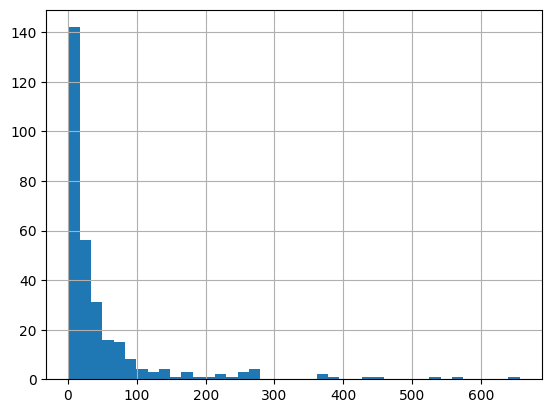

In [58]:
new_df['token_count'].hist(bins = 40)

As there are otherwise not enough rows to perform analysis on, we split the text into chunks of 30 to perform training on.

In [59]:
def split_text(text):
    words = word_tokenize(text)
    result = []
    current_item = []
    current_length = 0

    for word in words:
        if current_length + len(word) + len(current_item) > 10:
            if len(current_item) >= 30:
                result.append(current_item)
                current_item = [word]
                current_length = len(word)
            else:
                current_item += [word]
                current_length += len(word)
        else:
            current_item.append(word)
            current_length += len(word)

    if current_item:
        result.append(current_item)

    return result


def expand_dataframe(df, col_Name):
    rows = []
    for index, row in df.iterrows():
        name = row['characters']
        name_list = row[col_Name]
        for item in name_list:
            rows.append([name, " ".join(item)])

    new_df = pd.DataFrame(rows, columns=['characters', 'Chunk'])
    return new_df

In [60]:
convo_df_main['Chunks'] = convo_df_main['text_out_processed'].apply(split_text)
df_main_chunked = expand_dataframe(convo_df_main, "Chunks")

In [61]:
df_main_chunked

,characters,Chunk
0,Gerald_Scarlett,careful careful take back
1,Melanie_Scarlett,something important tell hardly know say nearl...
2,Gerald_Scarlett,none county touch state well missy
3,Gerald_Scarlett,reason bought asked buy well use buying going ...
4,Gerald_Scarlett,twelve oaks usual cade settled set gallery sev...
...,...,...
676,Ashley_Scarlett,love ca wear ley never really loved ley certai...
677,Ashley_Scarlett,god knows see need explanations truth plain ev...
678,Ashley_Scarlett,back find cared much believe would killed died...
679,Ashley_Scarlett,care laugh like wanted take care pet give ever...


Now this data can be vectorized:

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df=0.9)

In [63]:
df_main_chunked['characters'].value_counts()

characters
Rhett_Scarlett      283
Melanie_Scarlett    185
Ashley_Scarlett     140
Gerald_Scarlett      73
Name: count, dtype: int64

As there is a class imbalance, we first want to select 30 real observations from each group, and then augment the training classes through SMOTE:

In [64]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_test = df_main_chunked.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 30)

In [65]:
df_train = df_main_chunked[~df_main_chunked.index.isin(df_test.index)]

In [66]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Rhett_Scarlett      253
Melanie_Scarlett    155
Ashley_Scarlett     110
Gerald_Scarlett      43
Name: count, dtype: int64
characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64


As one class is overbalanced, we want to reduce the majority class to 150 so that for Gerald the oversampling is not too much:

In [67]:
df_train = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 150)

In [68]:
X_train = vectorizer.fit_transform(df_train['Chunk'])
X_test = vectorizer.transform(df_test['Chunk'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [69]:
y_train.value_counts()

characters
Melanie_Scarlett    150
Rhett_Scarlett      150
Ashley_Scarlett     110
Gerald_Scarlett      43
Name: count, dtype: int64

In [70]:
y_test.value_counts()

characters
Ashley_Scarlett     30
Gerald_Scarlett     30
Melanie_Scarlett    30
Rhett_Scarlett      30
Name: count, dtype: int64

In [71]:
!pip install imbalanced-learn

In [72]:
from imblearn.over_sampling import SMOTE

def smote_upsampling(X, y):
    """
    Perform SMOTE upsampling on the input features and target labels.

    Parameters:
        X (array-like): Input features.
        y (array-like): Target labels.

    Returns:
        X_resampled (array-like): Resampled features.
        y_resampled (array-like): Resampled target labels.
    """
    # Initialize SMOTE object
    smote = SMOTE()

    # Perform SMOTE upsampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

# Example usage:
# X_train and y_train are your training features and labels, respectively
X_train_resampled, y_train_resampled = smote_upsampling(X_train, y_train)

In [73]:
print(y_train_resampled.value_counts())

characters
Ashley_Scarlett     150
Gerald_Scarlett     150
Melanie_Scarlett    150
Rhett_Scarlett      150
Name: count, dtype: int64


##6. Logistic Regression


We perform a GridSearch on the training data

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']# Penalty term
}

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
gridsearch = GridSearchCV(logreg, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

In [75]:
gridsearch.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Then we take the best results of the grisearch and fit it to the model:

In [76]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [77]:
cv_results_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.058936,0.011716,0.002082,0.000070,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.725000,0.775000,0.691667,0.766667,0.666667,0.725000,0.041833,1
19,2.800297,0.998320,0.004500,0.004177,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.725000,0.775000,0.691667,0.766667,0.658333,0.723333,0.044222,2
15,0.473661,0.163844,0.004650,0.002658,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.716667,0.775000,0.683333,0.766667,0.658333,0.720000,0.045522,3
14,0.069927,0.015152,0.003924,0.004107,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.716667,0.775000,0.683333,0.758333,0.641667,0.715000,0.048705,4
11,0.187493,0.056275,0.007804,0.004576,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.700000,0.750000,0.658333,0.758333,0.666667,0.706667,0.041298,5
10,0.064066,0.005531,0.005593,0.003914,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.708333,0.750000,0.658333,0.725000,0.675000,0.703333,0.033166,6
16,0.281466,0.089271,0.002991,0.002121,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.733333,0.725000,0.666667,0.675000,0.625000,0.685000,0.039930,7
17,12.791762,1.464061,0.007349,0.006366,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.766667,0.725000,0.608333,0.675000,0.608333,0.676667,0.062893,8
12,16.628437,20.736295,0.001995,0.000157,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.708333,0.708333,0.600000,0.666667,0.608333,0.658333,0.046845,9
13,13.084697,1.096317,0.006207,0.003426,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.700000,0.708333,0.583333,0.641667,0.591667,0.645000,0.052334,10


In [78]:
logregfinal = LogisticRegression(max_iter = 1000, solver = "liblinear", penalty = "l2", C = 100)
logregfinal.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, max_iter=1000, solver='liblinear')

In [79]:
y_pred = logregfinal.predict(X_test)

In [80]:
y_pred

array(['Ashley_Scarlett', 'Rhett_Scarlett', 'Melanie_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Gerald_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Gerald_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Gerald_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Gerald_Scarlett', 'Gerald_Scarlett', 'Gerald_Scarlett',
       'Melanie_Scarlett', 'Ashley_Sca

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.38      0.37      0.37        30
 Gerald_Scarlett       0.92      0.37      0.52        30
Melanie_Scarlett       0.45      0.57      0.50        30
  Rhett_Scarlett       0.39      0.53      0.45        30

        accuracy                           0.46       120
       macro avg       0.53      0.46      0.46       120
    weighted avg       0.53      0.46      0.46       120



In [83]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=ad3bfafba26847131f492bab61ce9f13244f11d801f616f46d86254696d0f5d2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [84]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

Check the results of the performance

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score

default_metrics = {
    'accuracy': accuracy_score,
    'recall': lambda y_t, y_p: recall_score(y_t, y_p, zero_division="warn", average='micro'),
    'precision': lambda y_t, y_p: precision_score(y_t, y_p, zero_division="warn", average='micro'),
    'f1': lambda y_t, y_p: f1_score(y_t, y_p, zero_division= "warn", average ='macro')
}


def plot_accuracy(df, metrics):
    y_true = df['characters']
    y_pred = df['prediction']

    # Plot count confusion matrix
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # Show plot
    plt.show()

    # Calculate metrics
    metrics = {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
    print(metrics)

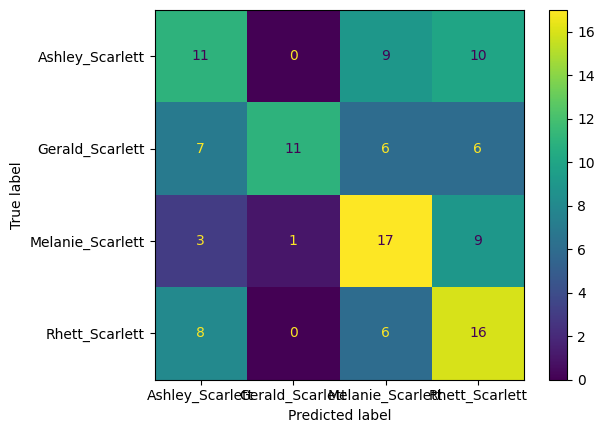

{'accuracy': 0.4583333333333333, 'recall': 0.4583333333333333, 'precision': 0.4583333333333333, 'f1': 0.46184877627346}


In [86]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

In [87]:
df_test[(df_test['characters'] == "Ashley_Scarlett") & (df_test['prediction'] == "Rhett_Scarlett")]

,characters,Chunk,prediction
421,Ashley_Scarlett,manager offered half interest told already mad...,Rhett_Scarlett
187,Ashley_Scarlett,father nearly came today oh pa pa going war co...,Rhett_Scarlett
582,Ashley_Scarlett,hate hear talk like ley sound like always harp...,Rhett_Scarlett
591,Ashley_Scarlett,believe anything wrong,Rhett_Scarlett
204,Ashley_Scarlett,varmint think like varmint known dyed in the w...,Rhett_Scarlett
441,Ashley_Scarlett,amendment letting darkies vote know submitted ...,Rhett_Scarlett
635,Ashley_Scarlett,afraid people say long right never felt convic...,Rhett_Scarlett
412,Ashley_Scarlett,melt mouth hear well go say get every cent got...,Rhett_Scarlett
38,Ashley_Scarlett,let hot headed let war misery world caused war...,Rhett_Scarlett
469,Ashley_Scarlett,military district number three,Rhett_Scarlett


In [88]:
df_test = df_test.reset_index()

In [89]:
eli5.show_prediction(logregfinal, X_test[5], top =20, feature_names = vectorizer.get_feature_names_out())

In [90]:
import numpy as np

In [91]:
t = X_test[5].toarray()
np.array(vectorizer.get_feature_names_out())[np.where(t != 0)[1]]

array(['able', 'agreed', 'away', 'ca', 'ca walk', 'came', 'course',
       'course ca', 'done', 'far', 'father', 'fence', 'going', 'knee',
       'lot', 'mother', 'nearly', 'oh', 'oh pa', 'pa', 'pare', 'riding',
       'rough', 'said', 'today', 'walk', 'war', 'would'], dtype=object)

In [92]:
df_test.loc[5, 'Chunk']

'father nearly came today oh pa pa going war course ca walk far stiff knee riding away mother agreed providing able jump pare fence said would lot rough riding done'

## 8. Sentiment Analysis Regression

In [93]:
from transformers import pipeline
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", max_length = 512, truncation = True)

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer = tokenizer,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [94]:
# Sentiment Analysis (Positive Score)
def get_sentiment_score(sentiment_results):
    # Extract positive and negative scores
    positive_score = sentiment_results[0][0]['score']
    negative_score = sentiment_results[0][2]['score']

    # Choose the score based on the highest absolute value
    if abs(positive_score) > abs(negative_score):
        return positive_score
    else:
        return -1 * negative_score

tokenizer_kwargs = {'truncation':True,'max_length':512}
def sentiment_analysis_score(text):
    sentiment_results = distilled_student_sentiment_classifier(text, **tokenizer_kwargs)
    positive_score = sentiment_results[0][0]['score']
    negative_score = sentiment_results[0][2]['score']

    # Choose the score based on the highest absolute value
    if abs(positive_score) > abs(negative_score):
        return positive_score
    else:
        return -1 * negative_score

In [95]:
df_main_chunked['sent_score'] = df_main_chunked['Chunk'].apply(sentiment_analysis_score)

In [96]:
df_main_chunked.groupby(['characters']).agg({'sent_score': 'mean'})

,sent_score
characters,
Ashley_Scarlett,-0.086530
Gerald_Scarlett,-0.137035
Melanie_Scarlett,-0.063165
Rhett_Scarlett,-0.111630


In [97]:
y_train_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_train.index)]
y_test_sent = df_main_chunked['sent_score'][df_main_chunked.index.isin(df_test.index)]

In [98]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train_sent)

RandomForestRegressor(random_state=42)

In [99]:
import numpy as np
importances = RF_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()  # Assuming X is a DataFrame and columns represent feature names

# Sort feature importances in descending order
indices = np.argsort(importances)

# Top 20 features
top_indices = indices[-20:]

# Bottom 20 features
bottom_indices = indices[:20]

# Print the top 20 feature ranking
print("Top 20 most important features:")
for i, idx in enumerate(top_indices[::-1]):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

# Print the bottom 20 feature ranking
print("\nBottom 20 least important features:")
for i, idx in enumerate(bottom_indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {importances[idx]}")

Top 20 most important features:
1. Feature 'never': 0.0340895262086077
2. Feature 'ley': 0.017722968743492266
3. Feature 'go': 0.015528879803041396
4. Feature 'things': 0.014461860668237752
5. Feature 'get': 0.012943230035078824
6. Feature 'army': 0.012111816190641427
7. Feature 'think': 0.011877907935164838
8. Feature 'darling': 0.011323184956271458
9. Feature 'well': 0.010897497902483693
10. Feature 'take': 0.010830851453040856
11. Feature 'another': 0.01076050424991058
12. Feature 'like': 0.010238271040168567
13. Feature 'much': 0.009823271445228425
14. Feature 'away': 0.0091900164283127
15. Feature 'old': 0.009074657619884153
16. Feature 'let': 0.008628593478678228
17. Feature 'wife': 0.008272889110790436
18. Feature 'keep': 0.008237120699898928
19. Feature 'home': 0.008183173956748878
20. Feature 'ragamuffin': 0.008182572461266309

Bottom 20 least important features:
1. Feature 'ability': 0.0
2. Feature 'mills mules': 0.0
3. Feature 'mills mules build': 0.0
4. Feature 'mills told'

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are the true and predicted target values, respectively
# Compute Mean Absolute Error (MAE)
y_pred_sent = RF_model.predict(X_test)
mae = mean_absolute_error(y_test_sent, y_pred_sent)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_sent, y_pred_sent)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_sent, y_pred_sent, squared=False)

# Compute R-squared (R2)
r2 = r2_score(y_test_sent, y_pred_sent)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6585813192899029
Mean Squared Error (MSE): 0.5279643946912916
Root Mean Squared Error (RMSE): 0.7266115844736386
R-squared (R2): -0.33647179607928335


## 9. LDA

Melanie_Scarlett

In [103]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Melanie['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")


# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

Text 1 Topics:
Topic 1: ['know', 'oh', 'home', 'want', 'get', 'little', 'honey', 'mr', 'things', 'got']
Topic 2: ['know', 'think', 'oh', 'got', 'miss', 'home', 'mr', 'little', 'must', 'get']
Topic 3: ['oh', 'know', 'things', 'honey', 'think', 'mr', 'miss', 'little', 'home', 'want']
Topic 4: ['oh', 'know', 'got', 'miss', 'get', 'mr', 'think', 'little', 'home', 'want']
Topic 5: ['oh', 'know', 'want', 'got', 'get', 'honey', 'think', 'ley', 'miss', 'good']
Text 2 Topics:
Topic 1: ['think', 'hospital', 'well', 'go', 'know', 'quite', 'must', 'dear', 'lady', 'lead']
Topic 2: ['well', 'go', 'think', 'oh', 'know', 'quite', 'enough', 'mrs', 'minute', 'home']
Topic 3: ['think', 'hospital', 'go', 'must', 'know', 'well', 'quite', 'mrs', 'like', 'dear']
Topic 4: ['think', 'quite', 'go', 'well', 'mrs', 'know', 'lead', 'must', 'hospital', 'lady']
Topic 5: ['think', 'hospital', 'well', 'go', 'must', 'mrs', 'know', 'quite', 'enough', 'gentlemen']
Text 3 Topics:
Topic 1: ['oh', 'heart', 'home', 'dear', '

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.050259 -0.094384       1        1  35.502625
3     -0.070883  0.089698       2        1  31.813343
1     -0.012700  0.021732       3        1  13.812265
4      0.131495  0.014947       4        1  11.478378
0      0.002347 -0.031992       5        1   7.393390, topic_info=        Term       Freq      Total Category  logprob  loglift
31       get  26.000000  26.000000  Default  30.0000  30.0000
61     never  14.000000  14.000000  Default  29.0000  29.0000
166       go  25.000000  25.000000  Default  28.0000  28.0000
103    would  25.000000  25.000000  Default  27.0000  27.0000
49       ley  25.000000  25.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
98      want   1.134921  13.782974   Topic5  -5.3666   0.1077
85   thought   1.134893   8.756392   Topic5  -5.3666   0.5613
81      tell   1.134875  15.036342   Topic5  -5.3666   0.0206
70    really   1.134840   8.131094   Topic5  -5.3667   0.6354
57        mr   1.134816   8.991324   Topic5  -5.3667   0.5348

[347 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
107       1  0.344060     afraid
107       2  0.573433     afraid
107       4  0.114687     afraid
722       3  0.303165      alone
722       4  0.303165      alone
...     ...       ...        ...
586       2  0.658115        yes
586       3  0.131623        yes
586       4  0.065811        yes
586       5  0.065811        yes
632       2  0.862024  yesterday

[521 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 1])

Gerald_Scarlett

In [104]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Gerald['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['oh', 'marry', 'like', 'daughter', 'wilkes', 'would', 'come', 's', 'ley', 'want']
Topic 2: ['like', 'oh', 'daughter', 'marry', 'would', 'come', 'wilkes', 'well', 'ley', 'man']
Topic 3: ['like', 'oh', 'marry', 'would', 'daughter', 'ley', 'come', 's', 'wilkes', 'well']
Topic 4: ['would', 'like', 'marry', 'oh', 'ley', 'come', 'wilkes', 'queer', 'daughter', 'pa']
Topic 5: ['like', 'oh', 'would', 'marry', 'ley', 'daughter', 'wilkes', 'come', 'well', 's']
Text 2 Topics:
Topic 1: ['man', 'cry', 'god', 'wo', 'look', 'sumter', 'saying', 'see', 'pa', 'like']
Topic 2: ['man', 'cry', 'look', 'like', 'make', 'lament', 'going', 'could', 'tara', 'pa']
Topic 3: ['cry', 'man', 'like', 'look', 'get', 'around', 'forget', 'lament', 'war', 'young']
Topic 4: ['cry', 'man', 'like', 'mr', 'know', 'course', 'lick', 'puss', 'could', 'forget']
Topic 5: ['look', 'cry', 'man', 'going', 'wo', 'orangeman', 'sumter', 'saying', 'young', 'like']
Text 3 Topics:
Topic 1: ['mother', 'home', 'house

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.112241 -0.023431       1        1  55.773026
4     -0.103103 -0.026998       2        1  44.219127
2     -0.003022  0.016909       3        1   0.003349
0     -0.003047  0.016798       4        1   0.002786
1     -0.003069  0.016723       5        1   0.001712, topic_info=      Term       Freq      Total Category  logprob  loglift
156    ley   9.000000   9.000000  Default  30.0000  30.0000
178  marry   8.000000   8.000000  Default  29.0000  29.0000
209     oh  13.000000  13.000000  Default  28.0000  28.0000
157   like  18.000000  18.000000  Default  27.0000  27.0000
396   home   8.000000   8.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
218     pa   0.000035  10.331982   Topic5  -6.6109  -1.6289
171   make   0.000035   7.848500   Topic5  -6.6109  -1.3540
48    come   0.000035   8.764048   Topic5  -6.6109  -1.4644
110   good   0.000035   5.365266   Topic5  -6.6110  -0.9737
287   tell   0.000035   7.881735   Topic5  -6.6110  -1.3583

[334 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
484       2  0.869520    acted
6         1  0.872997   always
10        1  1.040799  another
14        1  1.040807    asked
347       2  0.869546   asking
...     ...       ...      ...
337       1  0.983894        x
339       1  0.647044  yankees
339       2  0.485283  yankees
343       1  0.377401    young
343       2  0.566102    young

[239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

Ashley_Scarlett

In [105]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Ashley['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['love', 'thinks', 'till', 'let', 'know', 'knew', 'well', 'probably', 'could', 'wars']
Topic 2: ['love', 'know', 'thinks', 'let', 'knew', 'till', 'wars', 'think', 'marry', 'probably']
Topic 3: ['thinks', 'love', 'knew', 'know', 'till', 'let', 'think', 'day', 'probably', 'marry']
Topic 4: ['love', 'thinks', 'knew', 'let', 'till', 'know', 'could', 'day', 'think', 'marry']
Topic 5: ['love', 'thinks', 'knew', 'till', 'marry', 'know', 'let', 'day', 'could', 'well']
Text 2 Topics:
Topic 1: ['like', 'life', 'know', 'first', 'war', 'love', 'would', 'dear', 'could', 'came']
Topic 2: ['like', 'life', 'would', 'know', 'love', 'war', 'first', 'dear', 'real', 'well']
Topic 3: ['like', 'life', 'know', 'love', 'war', 'would', 'first', 'could', 'well', 'dear']
Topic 4: ['like', 'first', 'love', 'know', 'life', 'nothing', 'war', 'mrs', 'would', 'came']
Topic 5: ['life', 'like', 'know', 'war', 'dear', 'love', 'would', 'well', 'first', 'could']
Text 3 Topics:
Topic 1: ['ley', 'oh'

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.046415 -0.082432       1        1  56.547635
3      0.087516  0.087130       2        1  23.298430
2     -0.108282  0.040430       3        1  20.150092
4     -0.012811 -0.022600       4        1   0.002232
0     -0.012836 -0.022528       5        1   0.001611, topic_info=       Term      Freq      Total Category  logprob  loglift
343    life  13.00000  13.000000  Default  30.0000  30.0000
105  afraid   8.00000   8.000000  Default  29.0000  29.0000
566  wanted  11.00000  11.000000  Default  28.0000  28.0000
34       go  18.00000  18.000000  Default  27.0000  27.0000
383   money  18.00000  18.000000  Default  26.0000  26.0000
..      ...       ...        ...      ...      ...      ...
171    come   0.00004  17.520394   Topic5  -7.1650  -1.9556
3    always   0.00004  12.862584   Topic5  -7.1650  -1.6466
83     want   0.00004  13.412948   Topic5  -7.1653  -1.6887
35     good   0.00004  13.309309   Topic5  -7.1653  -1.6810
21     dear   0.00004  13.157537   Topic5  -7.1654  -1.6696

[372 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         2  1.025913      acted
105       1  0.959514     afraid
821       3  1.057781  agreement
107       1  1.009006         ah
592       2  0.828075      aimed
...     ...       ...        ...
92        2  0.290761      would
92        3  0.072690      would
94        1  0.439654        yes
94        2  0.439654        yes
94        3  0.219827        yes

[355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])

Rhett_Scarlett

In [106]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assuming you have a DataFrame named combined_df_Melanie with 'text_out_processed' column
texts = combined_df_Rhett['text_out_processed'].apply(lambda x: x.split())

all_topics = []

# Iterate through each row and apply LDA
for text in texts:
    # Create a dictionary from the preprocessed data
    dictionary = Dictionary([text])

    # Convert the preprocessed text data into bag-of-words format
    bow_corpus = [dictionary.doc2bow(text)]

    # Train the LDA model
    num_topics = 5
    ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

    # Get the topics
    topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

    # Extract top words for each topic
    text_topics = []
    for topic_id, topic in topics:
        text_topics.append([word for word, _ in topic])

    all_topics.append(text_topics)

# Print the topics for each text
for idx, topics in enumerate(all_topics):
    print(f"Text {idx + 1} Topics:")
    for topic_id, topic_words in enumerate(topics):
        print(f"Topic {topic_id + 1}: {topic_words}")

# Visualize topics using PyLDAvis
!pip install pyldavis==3.2.1
# First, install or upgrade PyLDAvis and Gensim
!pip install --upgrade pyldavis gensim

# Then, import and use PyLDAvis
import pyLDAvis.gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Prepare visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text 1 Topics:
Topic 1: ['oh', 'never', 'one', 'england', 'green', 'like', 'well', 'money', 'would', 'long']
Topic 2: ['never', 'oh', 'money', 'think', 'like', 'one', 'get', 'bonnet', 'would', 'long']
Topic 3: ['money', 'never', 'bonnet', 'like', 'one', 'would', 'think', 'tell', 'oh', 'give']
Topic 4: ['think', 'never', 'like', 'oh', 'one', 'bonnet', 'get', 'give', 'well', 'would']
Topic 5: ['money', 'one', 'oh', 'think', 'like', 'long', 'england', 'could', 'never', 'would']
Text 2 Topics:
Topic 1: ['home', 'yankees', 'go', 'ca', 'oh', 'see', 'would', 'get', 'wo', 'going']
Topic 2: ['go', 'yankees', 'home', 'oh', 'going', 'see', 'would', 'get', 'tara', 'ca']
Topic 3: ['yankees', 'go', 'home', 'going', 'would', 'oh', 'get', 'ca', 'wo', 'good']
Topic 4: ['go', 'home', 'yankees', 'going', 'oh', 'would', 'get', 'wo', 'ca', 'think']
Topic 5: ['yankees', 'home', 'go', 'going', 'would', 'oh', 'ca', 'wo', 'let', 'like']
Text 3 Topics:
Topic 1: ['money', 'like', 'think', 'get', 'know', 'want', 

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.035468 -0.033924       1        1  40.317291
0      0.046285 -0.093342       2        1  32.881676
1     -0.105380  0.015581       3        1  19.785782
2      0.064306  0.040522       4        1   7.013903
3      0.030257  0.071163       5        1   0.001348, topic_info=         Term       Freq      Total Category  logprob  loglift
267      know  59.000000  59.000000  Default  30.0000  30.0000
279       ley  22.000000  22.000000  Default  29.0000  29.0000
565   yankees  25.000000  25.000000  Default  28.0000  28.0000
343     never  54.000000  54.000000  Default  27.0000  27.0000
109     could  32.000000  32.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
496    things   0.000044  21.672080   Topic5  -7.6836  -1.8917
96       come   0.000044  26.047787   Topic5  -7.6837  -2.0756
279       ley   0.000044  22.573562   Topic5  -7.6839  -1.9327
21   anything   0.000044  27.384956   Topic5  -7.6843  -2.1263
213       god   0.000044  19.582680   Topic5  -7.6848  -1.7915

[374 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
572       3  0.941681    action
2014      4  0.883623     afire
576       3  0.693074       air
1427      2  0.875860     alive
21        1  0.401680  anything
...     ...       ...       ...
565       3  0.634495   yankees
567       1  0.482001       yes
567       2  0.275429       yes
567       3  0.137715       yes
567       4  0.103286       yes

[497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 3, 4])